In [6]:
import pandas as pd
import os

In [7]:
RESULT_PATH = "/home/ne34gux/workspace/experiments/results/"

In [8]:
result_list = []
for file in os.listdir(RESULT_PATH):
    if file.endswith(".csv"):
        result_list.append(pd.read_csv(RESULT_PATH + file))
result_df = pd.concat(result_list).reset_index(drop=True)

result_df.head()

,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
0,single_coord_linear_mlp,case_k_003_left,0.1,30,grid128,False,mse,0.002918,0.025177,0.004662
1,single_coord_linear_mlp,case_k_008_right,0.1,30,grid128,False,mse,0.001897,0.023944,0.003602
2,single_coord_linear_mlp,case_m_006_left,0.1,30,grid128,False,mse,0.001868,0.023857,0.004080
3,single_coord_linear_mlp,case_w_027_right,0.1,30,grid128,False,mse,0.001947,0.024047,0.003793
4,single_coord_linear_mlp,case_w_038_left,0.1,30,grid128,False,mse,0.002515,0.025191,0.007442


In [9]:
result_df.to_csv(RESULT_PATH + "all_results.csv", index=False)

# Data Quality

In [10]:
import itertools

# check for missing models

model_list = result_df["Model_Name"].unique().tolist()
lr_list = result_df["Learning_Rate"].unique().tolist()
transf_list = result_df["Transformation"].unique().tolist()


# Create all possible combinations of the elements in the lists
combinations = list(itertools.product(model_list, lr_list, transf_list))

# Check for missing combinations
missing_data = []
for combination in combinations:
    model, lr, transf = combination
    if not ((result_df["Model_Name"] == model) & 
            (result_df["Learning_Rate"] == lr) & 
            (result_df["Transformation"] == transf)).any():
        missing_data.append({
            "Model_Name": model,
            "Learning_Rate": lr,
            "Transformation": transf
        })

# Convert missing data to a dataframe
missing_data_df = pd.DataFrame(missing_data)
missing_data_df

,Model_Name,Learning_Rate,Transformation
0,pointnetpp,0.1000,zerocenter
1,pointnetpp,0.1000,rel
2,pointnetpp,0.0100,zerocenter
3,pointnetpp,0.0100,rel
4,pointnetpp,0.0010,zerocenter
5,pointnetpp,0.0010,rel
6,pointnetpp,0.0001,zerocenter
7,pointnetpp,0.0001,rel


In [56]:
# import subprocess

# # Parameters
# model_name = "coord_linear_encoder"
# transform = "unit_cube"
# learning_rate = "0.01"

# # Command to run
# cmd = ["./submit_job.sh", model_name, transform, learning_rate]

# # Run the command
# try:
#     subprocess.run(cmd, check=True)
#     print("Job submitted successfully.")
# except subprocess.CalledProcessError as e:
#     print(f"An error occurred while submitting the job: {e}")

In [57]:
result_df[result_df["Epochs"]==1]

,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity


# single_coord_linear_mlp

In [58]:
single_coord_mlp_df = result_df[result_df["Model_Name"] == "single_coord_linear_mlp"]
single_coord_mlp_df

,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
0,single_coord_linear_mlp,case_k_003_left,0.1000,30,grid128,False,mse,0.002918,0.025177,0.004662
1,single_coord_linear_mlp,case_k_008_right,0.1000,30,grid128,False,mse,0.001897,0.023944,0.003602
2,single_coord_linear_mlp,case_m_006_left,0.1000,30,grid128,False,mse,0.001868,0.023857,0.004080
3,single_coord_linear_mlp,case_w_027_right,0.1000,30,grid128,False,mse,0.001947,0.024047,0.003793
4,single_coord_linear_mlp,case_w_038_left,0.1000,30,grid128,False,mse,0.002515,0.025191,0.007442
...,...,...,...,...,...,...,...,...,...,...
1255,single_coord_linear_mlp,case_w_038_left,0.0001,30,zerocenter,True,mse,0.053728,0.158938,0.427826
1256,single_coord_linear_mlp,bifurication,0.0001,30,zerocenter,True,mse,0.019863,0.083951,0.871054
1257,single_coord_linear_mlp,aneurysm2,0.0001,30,zerocenter,True,mse,0.020161,0.099587,0.076953
1258,single_coord_linear_mlp,aneurysm1,0.0001,30,zerocenter,True,mse,0.028140,0.116060,0.200115


In [59]:
# Optimal MSE
single_coord_mlp_df[single_coord_mlp_df["MSE"] == single_coord_mlp_df["MSE"].min()]

,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
104,single_coord_linear_mlp,bifurication,0.001,30,grid64,False,mse,0.000044,0.001407,0.008959
608,single_coord_linear_mlp,bifurication,0.001,30,grid64,False,mse,0.000044,0.001407,0.008959
1112,single_coord_linear_mlp,bifurication,0.001,30,grid64,True,mse,0.000044,0.001407,0.008959


In [60]:
# Optimal MAE
single_coord_mlp_df[single_coord_mlp_df["MAE"] == single_coord_mlp_df["MAE"].min()]

,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
140,single_coord_linear_mlp,bifurication,0.0001,30,grid64,False,mse,0.000055,0.001392,0.008935
644,single_coord_linear_mlp,bifurication,0.0001,30,grid64,False,mse,0.000055,0.001392,0.008935
1148,single_coord_linear_mlp,bifurication,0.0001,30,grid64,True,mse,0.000055,0.001392,0.008935


In [61]:
# Optimal CS
single_coord_mlp_df[single_coord_mlp_df["Cosine_Similarity"] == single_coord_mlp_df["Cosine_Similarity"].max()]

,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
206,single_coord_linear_mlp,cylinder,0.001,30,unitcube,True,mse,0.003528,0.030358,0.954863
710,single_coord_linear_mlp,cylinder,0.001,30,unitcube,True,mse,0.003528,0.030358,0.954863
1214,single_coord_linear_mlp,cylinder,0.001,30,unitcube,True,mse,0.003528,0.030358,0.954863


In [62]:
single_coord_mlp_df.groupby("Case").apply(lambda x: x["MSE"].min())

/tmp/ipykernel_2220828/3682622593.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  single_coord_mlp_df.groupby("Case").apply(lambda x: x["MSE"].min())


Case
aneurysm1           0.001085
aneurysm2           0.000623
bifurication        0.000044
case_k_003_left     0.001481
case_k_008_right    0.000427
case_m_006_left     0.000401
case_w_027_right    0.000511
case_w_038_left     0.001104
cylinder            0.000159
dtype: float64

In [63]:
# for each single_coord_mlp_df.groupby(["Case", "Transformation", "Rotation"]) rank the models by MSE (min), MAE (min) and CS (max) and get the best overall model.

best_overall_models = single_coord_mlp_df.groupby(["Case", "Transformation"]).apply(
    lambda x: x.loc[
        (x["MSE"].rank(method="min") + x["MAE"].rank(method="min") + x["Cosine_Similarity"].rank(method="max")).idxmin()
    ]
).reset_index(drop=True)

best_overall_models

/tmp/ipykernel_2220828/198633975.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_overall_models = single_coord_mlp_df.groupby(["Case", "Transformation"]).apply(


,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
0,single_coord_linear_mlp,aneurysm1,0.0100,30,grid128,False,mse,0.002793,0.013002,0.007945
1,single_coord_linear_mlp,aneurysm1,0.0010,30,grid64,False,mse,0.001085,0.007238,0.020521
2,single_coord_linear_mlp,aneurysm1,0.0010,30,rel,False,mse,0.044562,0.157387,0.118899
3,single_coord_linear_mlp,aneurysm1,0.0010,30,unitcube,False,mse,0.015861,0.092312,0.119741
4,single_coord_linear_mlp,aneurysm1,0.0010,30,zerocenter,False,mse,0.016852,0.096346,0.195610
5,single_coord_linear_mlp,aneurysm2,0.0001,30,grid128,False,mse,0.002815,0.012582,0.002368
6,single_coord_linear_mlp,aneurysm2,0.0001,30,grid64,False,mse,0.000623,0.004110,0.005949
7,single_coord_linear_mlp,aneurysm2,0.1000,30,rel,False,mse,0.012721,0.074755,0.121061
8,single_coord_linear_mlp,aneurysm2,0.0100,30,unitcube,True,mse,0.009417,0.070842,0.108744
9,single_coord_linear_mlp,aneurysm2,0.1000,30,zerocenter,True,mse,0.012635,0.074762,0.098317


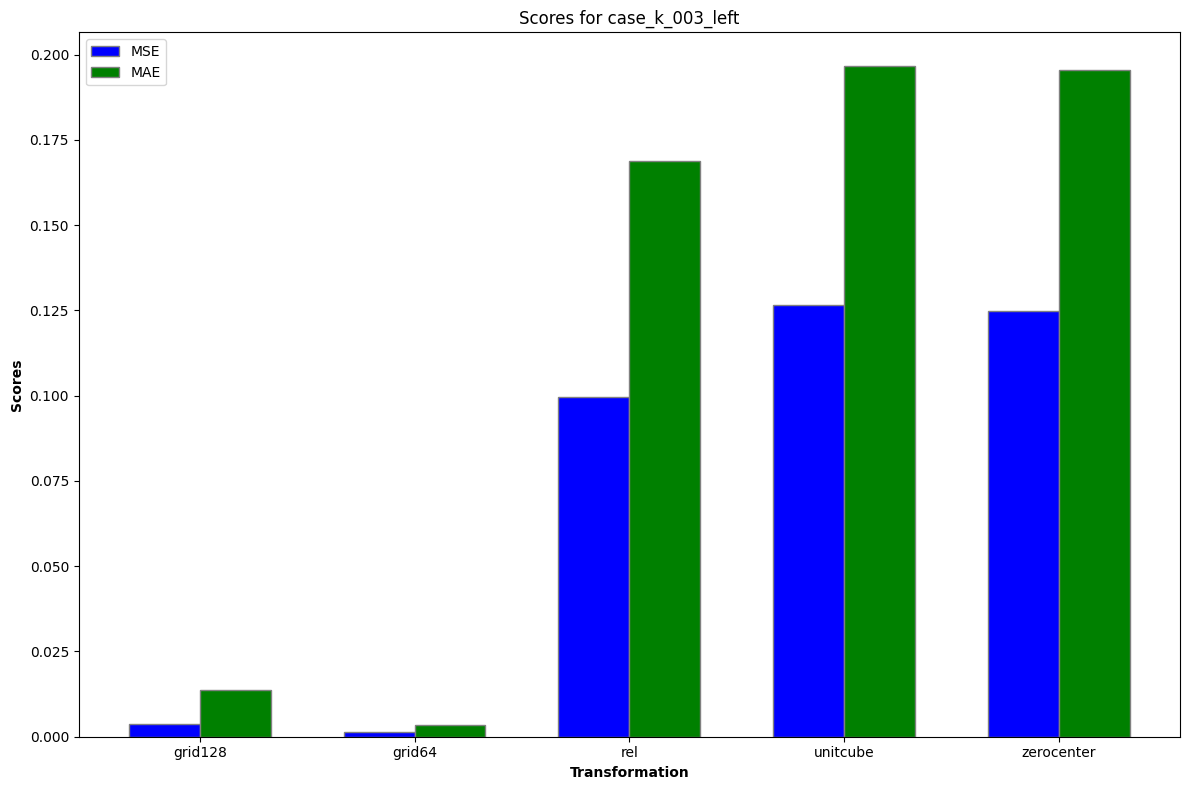

In [64]:
test_case = "case_k_003_left"

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width
bar_width = 0.33

# Set positions of the bars on the x-axis
r1 = range(len(best_overall_models[best_overall_models["Case"] == test_case]['Transformation']))
r2 = [x + bar_width for x in r1]

# Plot MSE
ax.bar(r1, best_overall_models[best_overall_models["Case"] == test_case]['MSE'], color='b', width=bar_width, edgecolor='grey', label='MSE')

# Plot MAE
ax.bar(r2, best_overall_models[best_overall_models["Case"] == test_case]['MAE'], color='g', width=bar_width, edgecolor='grey', label='MAE')


# Add labels
ax.set_xlabel('Transformation', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title(f'Scores for {test_case}')
ax.set_xticks([r + bar_width/2 for r in range(5)])
ax.set_xticklabels(best_overall_models[best_overall_models["Case"] == test_case]['Transformation'])

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

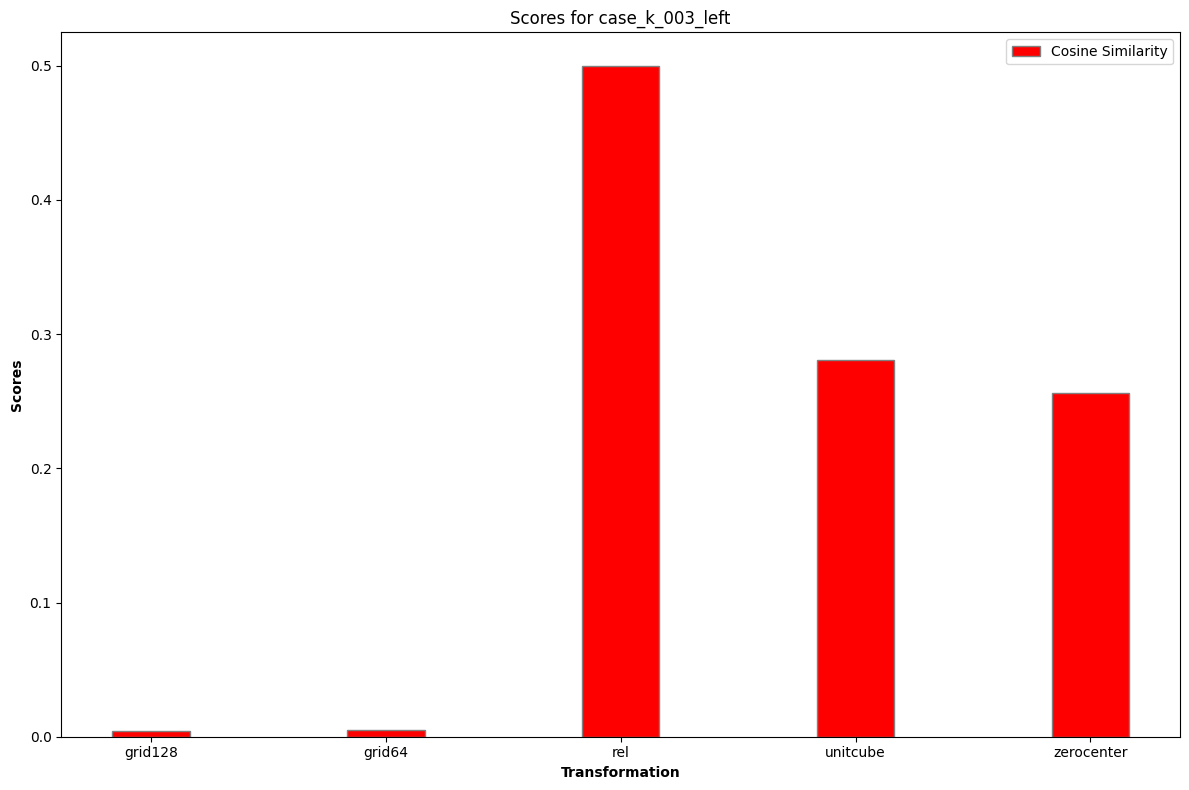

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(5), best_overall_models[best_overall_models["Case"] == test_case]['Cosine_Similarity'], color='r', width=bar_width, edgecolor='grey', label='Cosine Similarity')

ax.set_xlabel('Transformation', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title(f'Scores for {test_case}')
ax.set_xticks(range(5))
ax.set_xticklabels(best_overall_models[best_overall_models["Case"] == test_case]['Transformation'])
# Add legend
ax.legend()

plt.tight_layout()
plt.show()

In [66]:
for c in result_df.columns:
    print(c)

Model_Name
Case
Learning_Rate
Epochs
Transformation
Rotation
Loss_Function
MSE
MAE
Cosine_Similarity


In [68]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model_Name         3564 non-null   object 
 1   Case               3564 non-null   object 
 2   Learning_Rate      3564 non-null   float64
 3   Epochs             3564 non-null   int64  
 4   Transformation     3564 non-null   object 
 5   Rotation           3564 non-null   bool   
 6   Loss_Function      3564 non-null   object 
 7   MSE                3564 non-null   float64
 8   MAE                3564 non-null   float64
 9   Cosine_Similarity  3564 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(4)
memory usage: 254.2+ KB


In [69]:
result_df.head()

,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
0,single_coord_linear_mlp,case_k_003_left,0.1,30,grid128,False,mse,0.002918,0.025177,0.004662
1,single_coord_linear_mlp,case_k_008_right,0.1,30,grid128,False,mse,0.001897,0.023944,0.003602
2,single_coord_linear_mlp,case_m_006_left,0.1,30,grid128,False,mse,0.001868,0.023857,0.004080
3,single_coord_linear_mlp,case_w_027_right,0.1,30,grid128,False,mse,0.001947,0.024047,0.003793
4,single_coord_linear_mlp,case_w_038_left,0.1,30,grid128,False,mse,0.002515,0.025191,0.007442


In [72]:
result_df["Transformation"].unique()

array(['grid128', 'unitcube', 'zerocenter', 'grid64', 'rel'], dtype=object)

## 1. Leistung pro Modell und Transformation
### Fragen:
- Welches Modell hat insgesamt die beste Performance (niedrigster MSE, niedrigster MAE, höchste Cosine Similarity)?
- Wie unterscheiden sich die Ergebnisse der Modelle basierend auf den verschiedenen Transformationen?
- Welche Transformation liefert für die meisten Modelle die besten Ergebnisse?
### Visualisierungen:
- **Barplot**: Durchschnittliche MSE/MAE/Cosine Similarity pro Modell.
- **Boxplot**: Verteilung der MSE/MAE/Cosine Similarity für jedes Modell unter verschiedenen Transformationen.
- **Heatmap**: Durchschnittliche MSE/MAE/Cosine Similarity für jede Kombination aus Modell und Transformation.

In [ ]:
best_overall_models = result_df.groupby(["Case", "Transformation", "Rotation"]).apply(
    lambda x: x.loc[
        (x["MSE"].rank(method="min") + x["MAE"].rank(method="min") + x["Cosine_Similarity"].rank(method="max")).idxmin()
    ]
).reset_index(drop=True)

best_overall_models

/tmp/ipykernel_2220828/3242769784.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_overall_models = result_df.groupby(["Case", "Transformation", "Rotation"]).apply(


,Model_Name,Case,Learning_Rate,Epochs,Transformation,Rotation,Loss_Function,MSE,MAE,Cosine_Similarity
0,single_coord_linear_mlp,aneurysm1,0.0100,30,grid128,False,mse,0.002793,0.013002,0.007945
1,single_coord_linear_mlp,aneurysm1,0.0100,30,grid128,True,mse,0.002793,0.013002,0.007945
2,single_coord_linear_mlp,aneurysm1,0.1000,30,grid64,False,mse,0.001087,0.007911,0.016945
3,single_coord_linear_encoder,aneurysm1,0.1000,30,grid64,True,loss,0.001086,0.007582,0.015344
4,small_sample_linear_autoencoder,aneurysm1,0.0010,30,rel,False,mse,0.019442,0.108634,0.139611
...,...,...,...,...,...,...,...,...,...,...
85,small_sample_linear_autoencoder,cylinder,0.0010,30,rel,True,mse,0.004060,0.042546,0.899476
86,single_coord_linear_mlp,cylinder,0.1000,30,unitcube,False,mse,0.003834,0.039784,0.942642
87,single_coord_linear_encoder,cylinder,0.1000,30,unitcube,True,loss,0.003446,0.035691,0.949195
88,large_sample_linear_autoencoder,cylinder,0.0100,100,zerocenter,False,mse,0.003246,0.035789,0.946598


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Durchschnittliche Metriken pro Modell berechnen
avg_metrics_per_model = best_overall_models.groupby('Model_Name').mean(numeric_only=True).reset_index()

# Modell mit dem niedrigsten durchschnittlichen MSE
best_model_mse = avg_metrics_per_model.loc[avg_metrics_per_model['MSE'].idxmin()]

# Modell mit dem niedrigsten durchschnittlichen MAE
best_model_mae = avg_metrics_per_model.loc[avg_metrics_per_model['MAE'].idxmin()]

# Modell mit der höchsten durchschnittlichen Cosine Similarity
best_model_cosine = avg_metrics_per_model.loc[avg_metrics_per_model['Cosine_Similarity'].idxmax()]

print("Modell mit dem niedrigsten durchschnittlichen MSE:", best_model_mse['Model_Name'])
print("Modell mit dem niedrigsten durchschnittlichen MAE:", best_model_mae['Model_Name'])
print("Modell mit der höchsten durchschnittlichen Cosine Similarity:", best_model_cosine['Model_Name'])

Modell mit dem niedrigsten durchschnittlichen MSE: small_sample_linear_autoencoder
Modell mit dem niedrigsten durchschnittlichen MAE: single_coord_linear_encoder
Modell mit der höchsten durchschnittlichen Cosine Similarity: large_sample_linear_autoencoder


In [85]:
# Durchschnittliche Metriken pro Transformation
avg_metrics_per_transformation = best_overall_models.groupby('Transformation').mean(numeric_only=True).reset_index()

# Transformation mit dem niedrigsten durchschnittlichen MSE
best_transformation_mse = avg_metrics_per_transformation.loc[avg_metrics_per_transformation['MSE'].idxmin()]

# Transformation mit dem niedrigsten durchschnittlichen MAE
best_transformation_mae = avg_metrics_per_transformation.loc[avg_metrics_per_transformation['MAE'].idxmin()]

# Transformation mit der höchsten durchschnittlichen Cosine Similarity
best_transformation_cosine = avg_metrics_per_transformation.loc[avg_metrics_per_transformation['Cosine_Similarity'].idxmax()]

print("Transformation mit dem niedrigsten durchschnittlichen MSE:", best_transformation_mse['Transformation'])
print("Transformation mit dem niedrigsten durchschnittlichen MAE:", best_transformation_mae['Transformation'])
print("Transformation mit der höchsten durchschnittlichen Cosine Similarity:", best_transformation_cosine['Transformation'])

Transformation mit dem niedrigsten durchschnittlichen MSE: grid64
Transformation mit dem niedrigsten durchschnittlichen MAE: grid64
Transformation mit der höchsten durchschnittlichen Cosine Similarity: rel


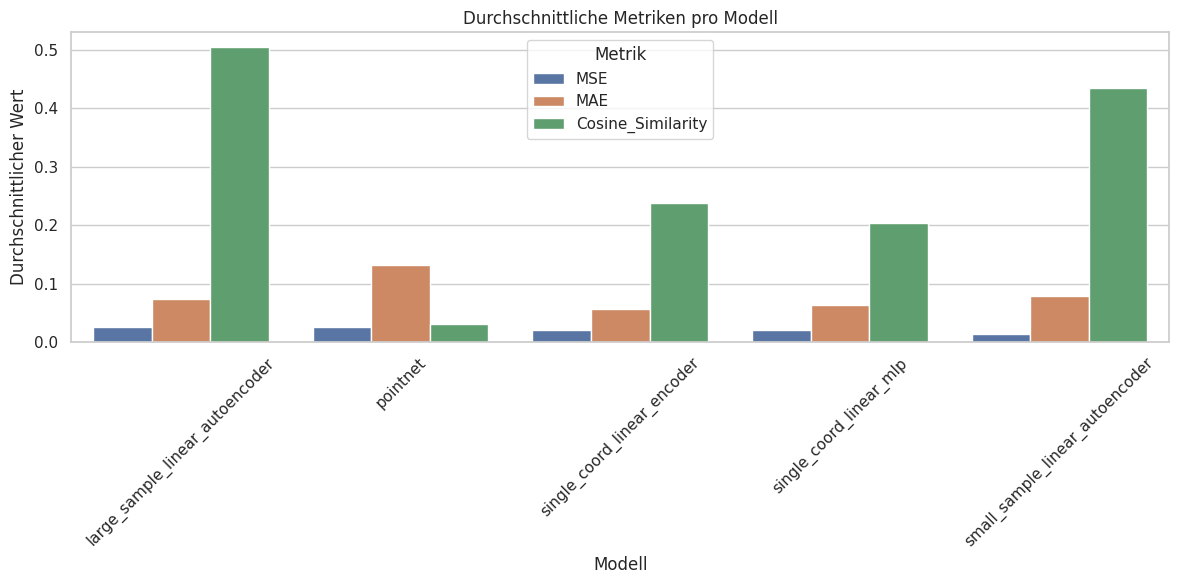

In [86]:
# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Metriken für den Plot auswählen
metrics = ['MSE', 'MAE', 'Cosine_Similarity']

# Daten für den Plot vorbereiten
avg_metrics_melted = avg_metrics_per_model.melt(id_vars='Model_Name', value_vars=metrics, var_name='Metric', value_name='Value')

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_metrics_melted, x='Model_Name', y='Value', hue='Metric')
plt.title('Durchschnittliche Metriken pro Modell')
plt.xlabel('Modell')
plt.ylabel('Durchschnittlicher Wert')
plt.legend(title='Metrik')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

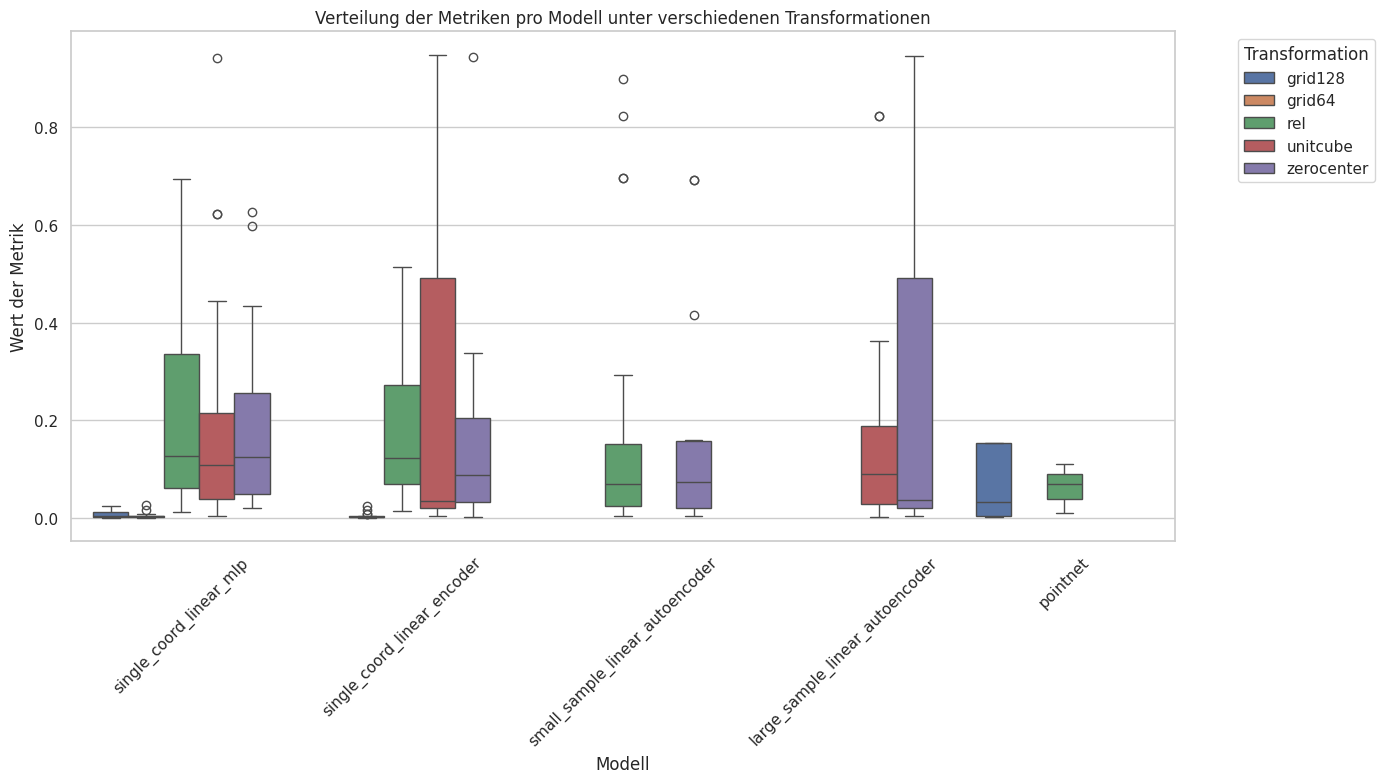

In [87]:
# Daten für den Plot vorbereiten
metrics_melted_full = best_overall_models.melt(id_vars=['Model_Name', 'Transformation'], value_vars=metrics, var_name='Metric', value_name='Value')

# Plot erstellen
plt.figure(figsize=(14, 8))
sns.boxplot(data=metrics_melted_full, x='Model_Name', y='Value', hue='Transformation')
plt.title('Verteilung der Metriken pro Modell unter verschiedenen Transformationen')
plt.xlabel('Modell')
plt.ylabel('Wert der Metrik')
plt.legend(title='Transformation', bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
avg_metrics_per_model_transformation

,Model_Name,Transformation,Learning_Rate,Epochs,Rotation,MSE,MAE,Cosine_Similarity
0,large_sample_linear_autoencoder,grid128,0.027775,100.0,0.333333,2.679949e-01,0.383497,0.003396
1,large_sample_linear_autoencoder,grid64,0.027775,100.0,0.333333,1.004080e+01,1.435942,0.004827
2,large_sample_linear_autoencoder,rel,0.027775,100.0,0.333333,7.297694e+13,654598.126019,0.294695
3,large_sample_linear_autoencoder,unitcube,0.027775,100.0,0.666667,1.191587e-01,0.176742,0.379861
4,large_sample_linear_autoencoder,zerocenter,0.027775,100.0,0.666667,4.108009e-02,0.123508,0.383412
5,pointnet,grid128,0.027775,100.0,1.000000,6.659881e-02,0.176185,0.003554
6,pointnet,grid64,0.027775,100.0,1.000000,5.790290e-02,0.150759,0.009695
7,pointnet,rel,0.027775,100.0,1.000000,4.410681e-02,0.127927,0.343807
8,pointnet,unitcube,0.027775,100.0,1.000000,3.611387e-02,0.116022,0.399552
9,pointnet,zerocenter,0.027775,100.0,1.000000,2.103019e-01,0.299667,0.357198


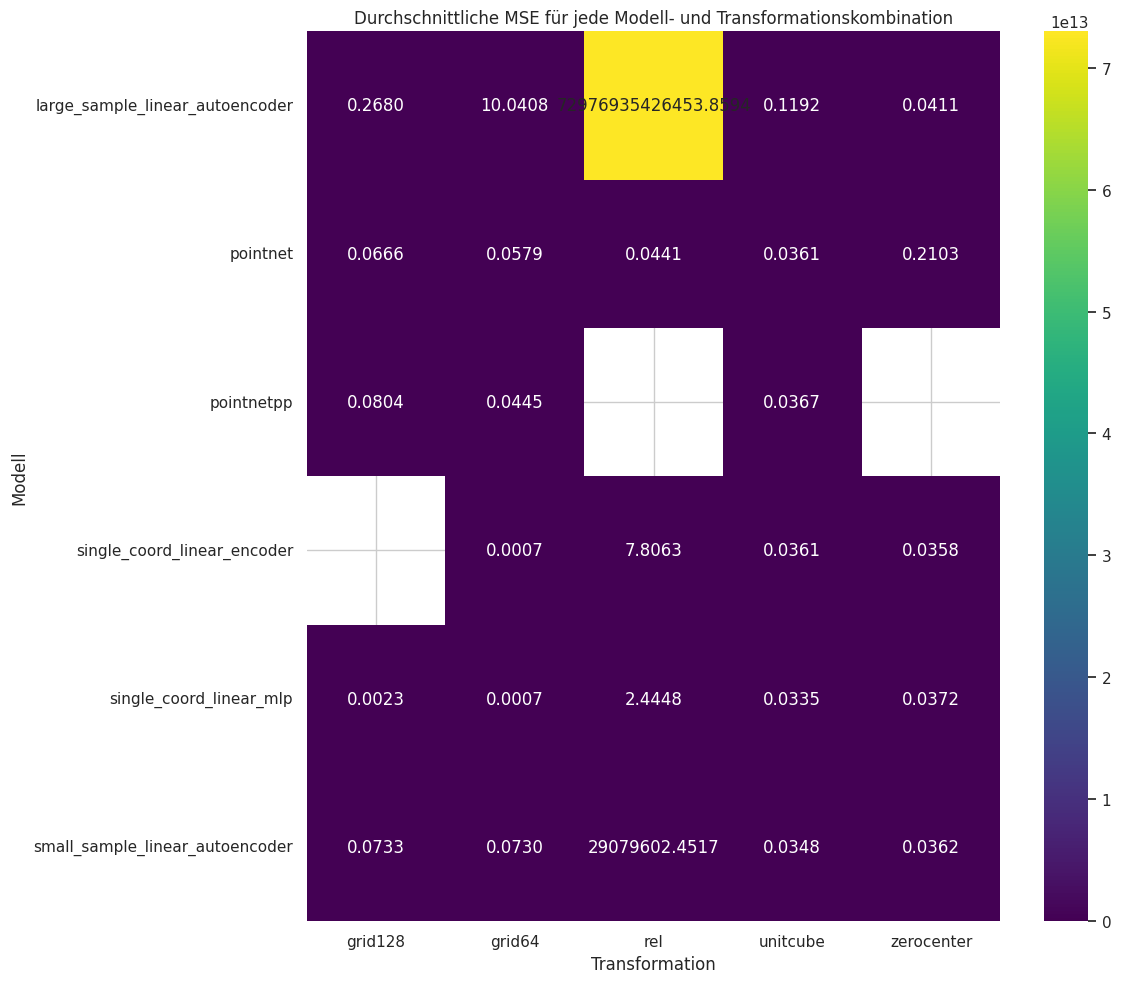

In [90]:
# Pivot-Tabelle erstellen
pivot_mse = avg_metrics_per_model_transformation.pivot_table(index='Model_Name', columns='Transformation', values='MSE')

# Heatmap erstellen
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_mse, annot=True, fmt=".4f", cmap='viridis')
plt.title('Durchschnittliche MSE für jede Modell- und Transformationskombination')
plt.xlabel('Transformation')
plt.ylabel('Modell')
plt.tight_layout()
plt.show()

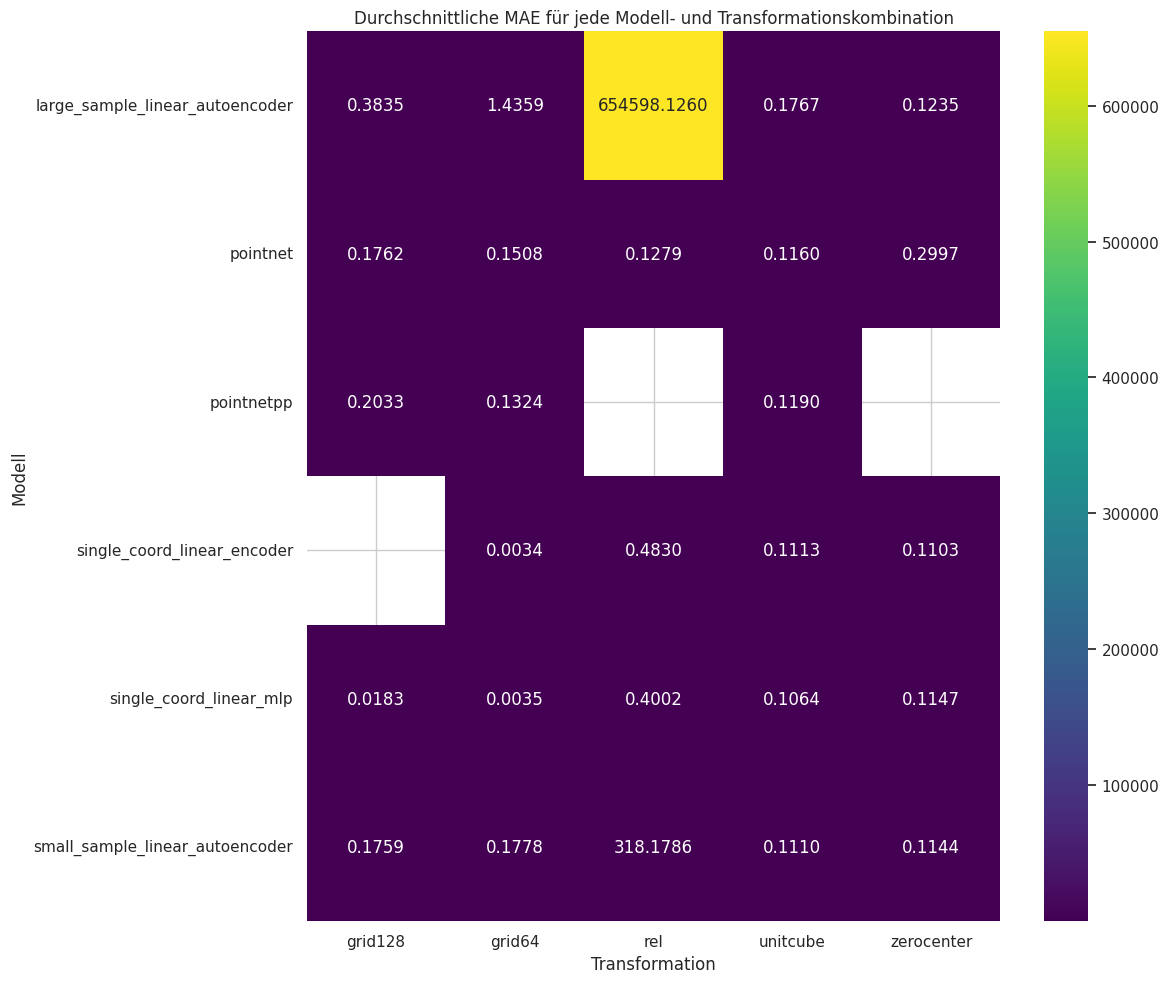

In [91]:
# Pivot-Tabelle erstellen
pivot_mse = avg_metrics_per_model_transformation.pivot_table(index='Model_Name', columns='Transformation', values='MAE')

# Heatmap erstellen
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_mse, annot=True, fmt=".4f", cmap='viridis')
plt.title('Durchschnittliche MAE für jede Modell- und Transformationskombination')
plt.xlabel('Transformation')
plt.ylabel('Modell')
plt.tight_layout()
plt.show()

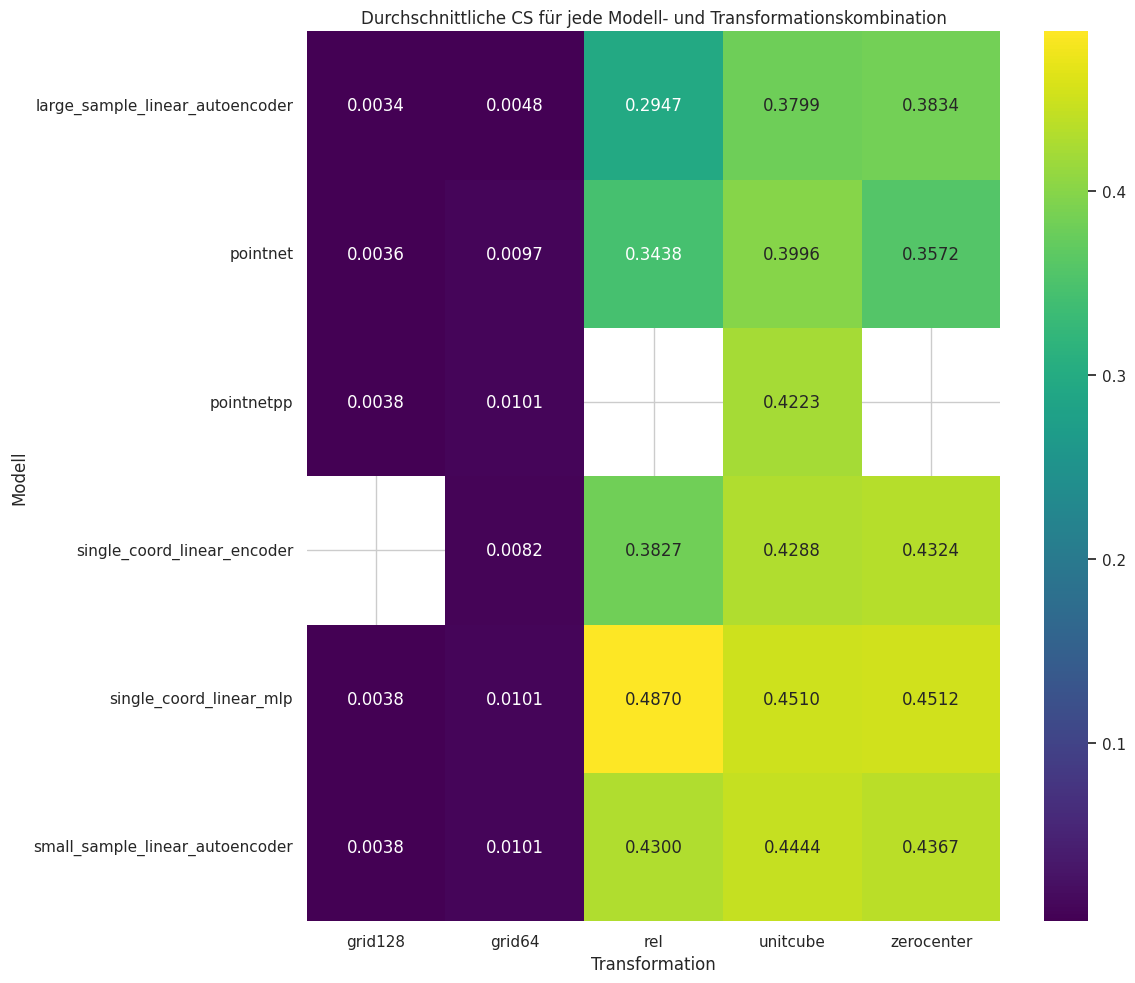

In [92]:
# Pivot-Tabelle erstellen
pivot_mse = avg_metrics_per_model_transformation.pivot_table(index='Model_Name', columns='Transformation', values='Cosine_Similarity')

# Heatmap erstellen
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_mse, annot=True, fmt=".4f", cmap='viridis')
plt.title('Durchschnittliche CS für jede Modell- und Transformationskombination')
plt.xlabel('Transformation')
plt.ylabel('Modell')
plt.tight_layout()
plt.show()

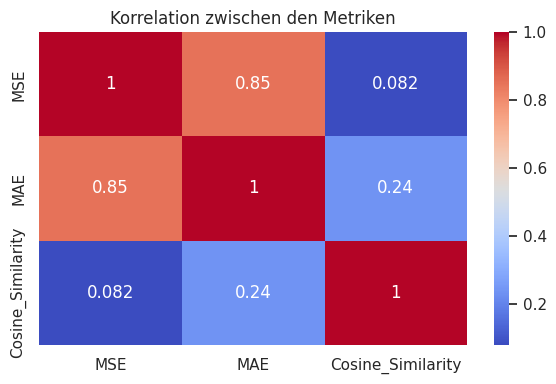

In [94]:
# Korrelation berechnen
metrics = ['MSE', 'MAE', 'Cosine_Similarity']
correlation_matrix = best_overall_models[metrics].corr()

# Heatmap der Korrelationen erstellen
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelation zwischen den Metriken')
plt.tight_layout()
plt.show()

## 2. Einfluss der Lernrate
### Fragen:
- Wie beeinflusst die Lernrate die Modellperformance?
- Gibt es eine optimale Lernrate für bestimmte Transformationen oder Modelle?
- Gibt es Wechselwirkungen zwischen Lernrate und Transformation?
### Visualisierungen:
- **Lineplot**: MSE/MAE/Cosine Similarity im Vergleich zur Lernrate für jedes Modell.
- **Facet Grid**: Lineplots für jede Transformation getrennt nach Modellen.
- **Scatterplot**: Lernrate vs. MSE/MAE, farbcodiert nach Transformation.

In [96]:
# Durchschnittliche Metriken pro Lernrate berechnen
avg_metrics_per_lr = result_df.groupby('Learning_Rate').mean(numeric_only=True).reset_index()

# Ansehen der Ergebnisse
print(avg_metrics_per_lr[['Learning_Rate', 'MSE', 'MAE', 'Cosine_Similarity']])

   Learning_Rate           MSE           MAE  Cosine_Similarity
0         0.0001  3.291831e-01      0.154485           0.292493
1         0.0010  6.107586e-02      0.128484           0.290800
2         0.0100  3.589396e+06     38.673194           0.299731
3         0.1000  8.845689e+12  79345.580374           0.225226


In [99]:
# Durchschnittliche Metriken pro Modell, Transformation und Lernrate
avg_metrics_per_model_trans_lr = result_df.groupby(['Model_Name', 'Transformation', 'Learning_Rate']).mean(numeric_only=True).reset_index()
avg_metrics_per_model_trans_lr

,Model_Name,Transformation,Learning_Rate,Epochs,Rotation,MSE,MAE,Cosine_Similarity
0,large_sample_linear_autoencoder,grid128,0.0001,100.0,0.333333,0.142746,0.265593,0.003735
1,large_sample_linear_autoencoder,grid128,0.0010,100.0,0.333333,0.078087,0.187288,0.003831
2,large_sample_linear_autoencoder,grid128,0.0100,100.0,0.333333,0.103619,0.226160,0.003776
3,large_sample_linear_autoencoder,grid128,0.1000,100.0,0.333333,0.747528,0.854946,0.002241
4,large_sample_linear_autoencoder,grid64,0.0001,100.0,0.333333,0.046725,0.106339,0.000771
...,...,...,...,...,...,...,...,...
103,small_sample_linear_autoencoder,unitcube,0.1000,30.0,0.666667,0.034531,0.110748,0.438105
104,small_sample_linear_autoencoder,zerocenter,0.0001,30.0,0.666667,0.034671,0.109073,0.416612
105,small_sample_linear_autoencoder,zerocenter,0.0010,30.0,0.666667,0.040317,0.124537,0.437262
106,small_sample_linear_autoencoder,zerocenter,0.0100,30.0,0.666667,0.035301,0.113572,0.445490


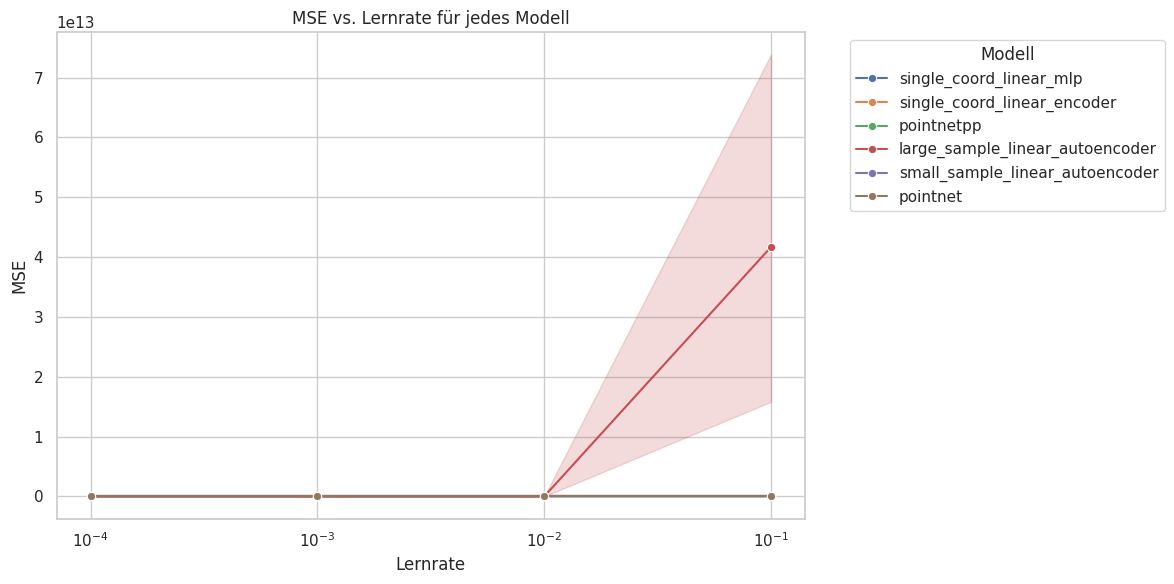

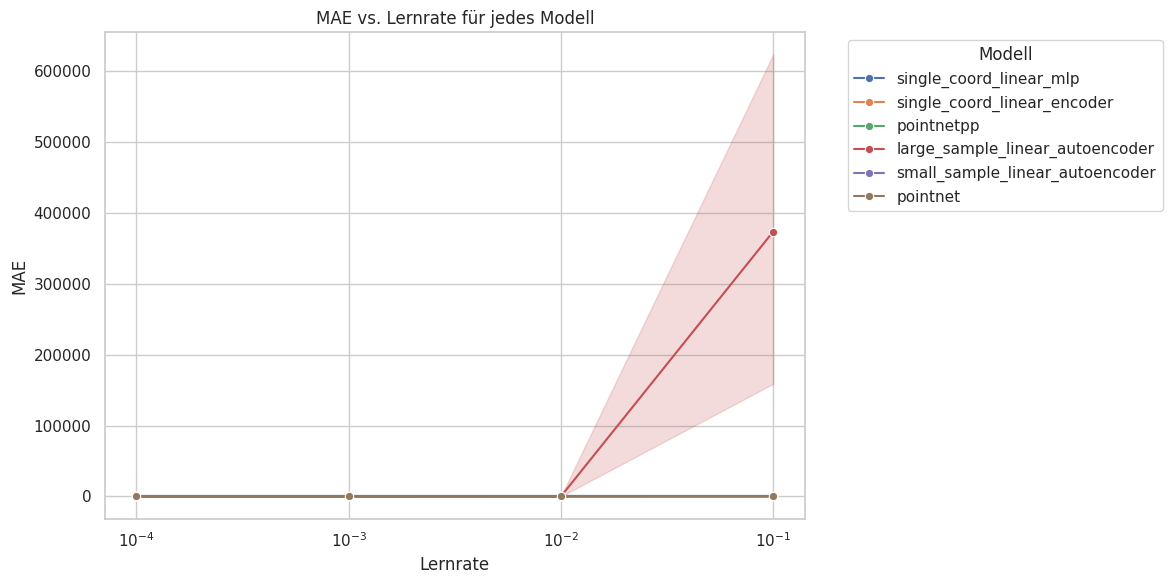

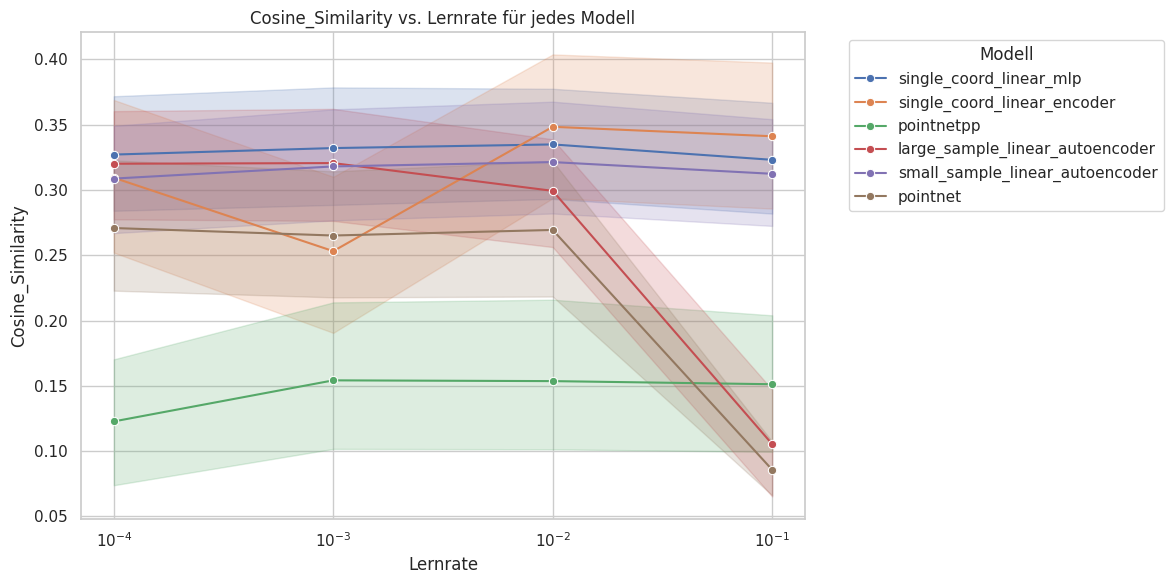

In [100]:
# # Optional: Lernrate in logarithmischer Skala darstellen
# result_df['Log_Learning_Rate'] = np.log10(result_df['Learning_Rate'])

# Metriken für den Plot
metrics = ['MSE', 'MAE', 'Cosine_Similarity']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=result_df, x='Learning_Rate', y=metric, hue='Model_Name', marker='o')
    plt.title(f'{metric} vs. Lernrate für jedes Modell')
    plt.xlabel('Lernrate')
    plt.ylabel(metric)
    plt.xscale('log')  # Lernrate logarithmisch skalieren
    plt.legend(title='Modell', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

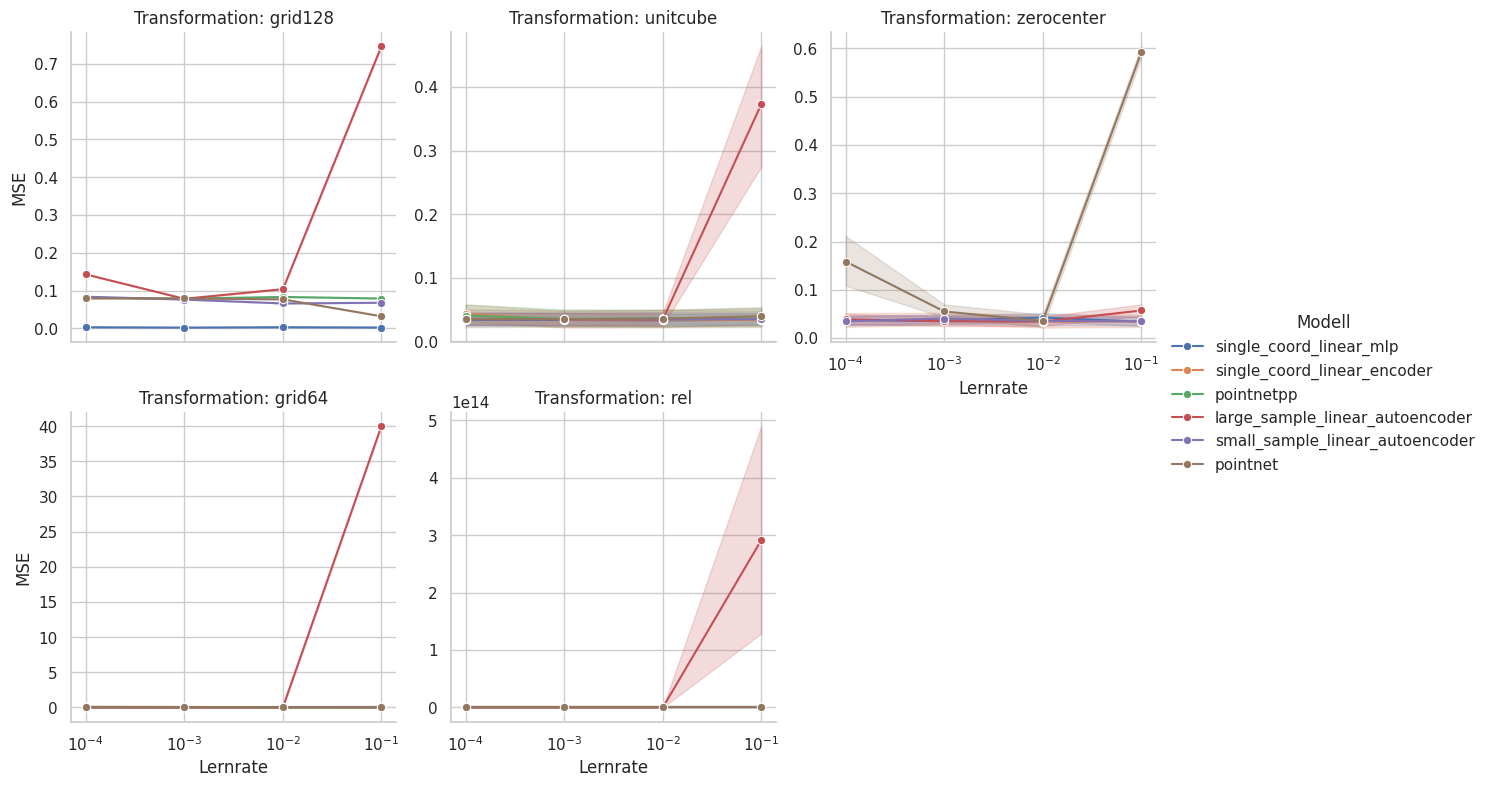

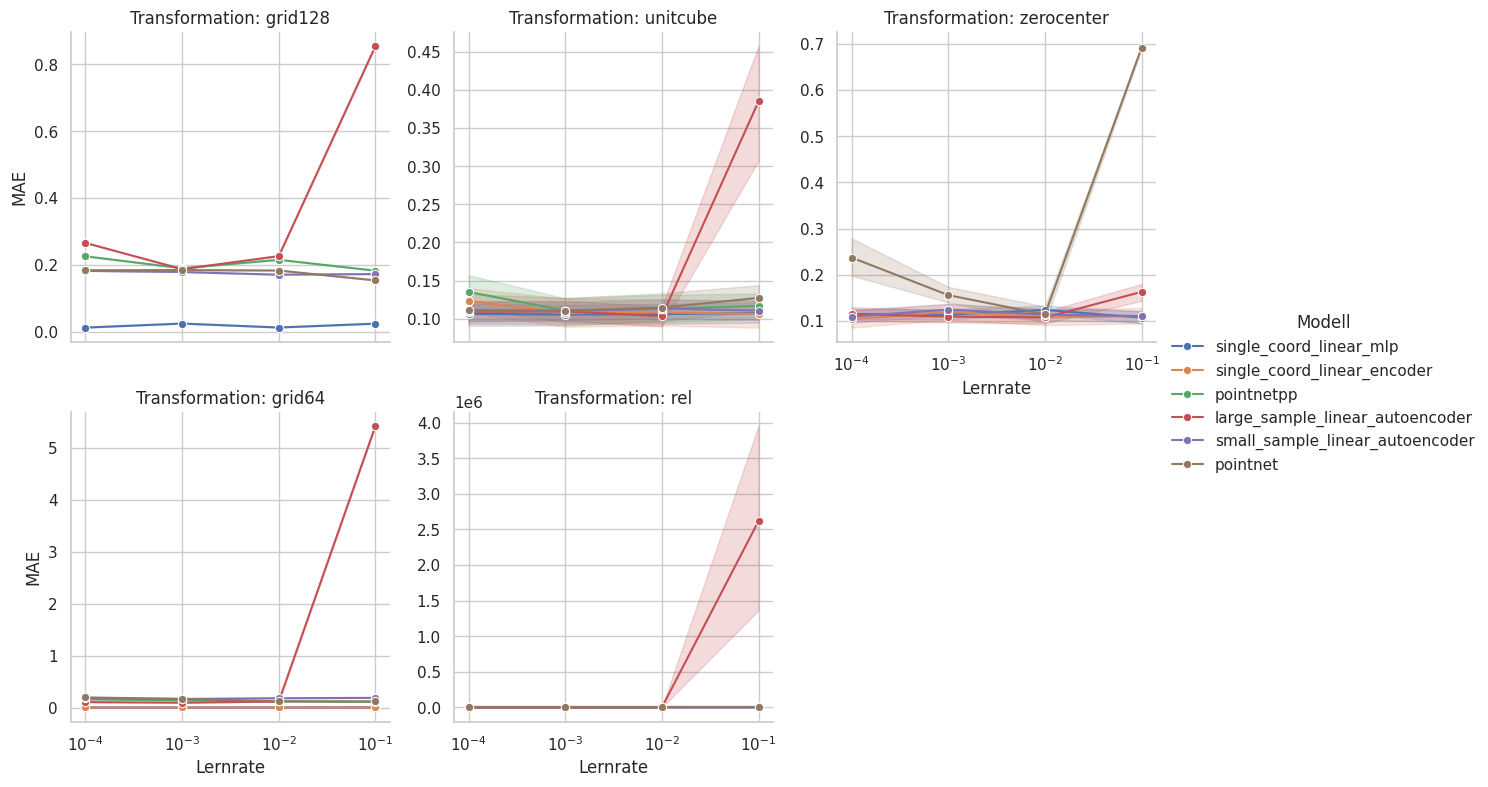

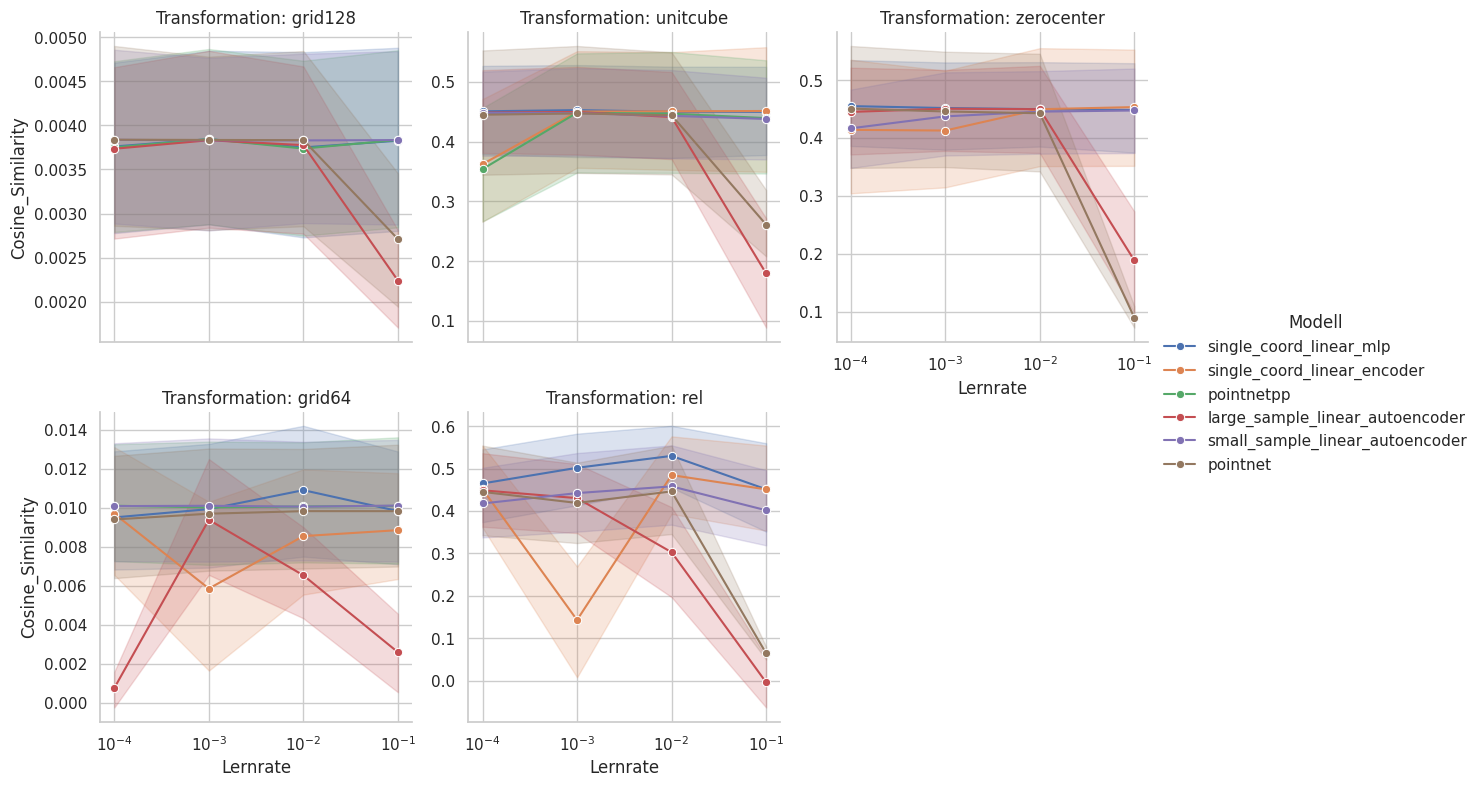

In [101]:
for metric in metrics:
    g = sns.FacetGrid(result_df, col='Transformation', hue='Model_Name', col_wrap=3, height=4, sharey=False)
    g.map(sns.lineplot, 'Learning_Rate', metric, marker='o')
    g.add_legend(title='Modell')
    g.set(yscale='linear', xscale='log')
    g.set_axis_labels('Lernrate', metric)
    g.set_titles('Transformation: {col_name}')
    plt.show()

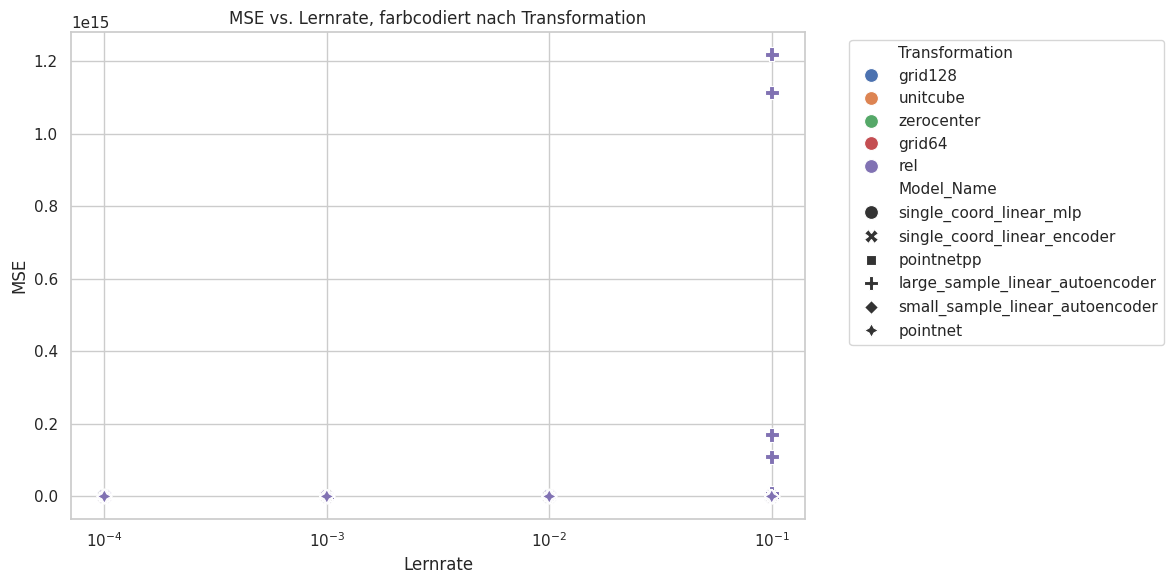

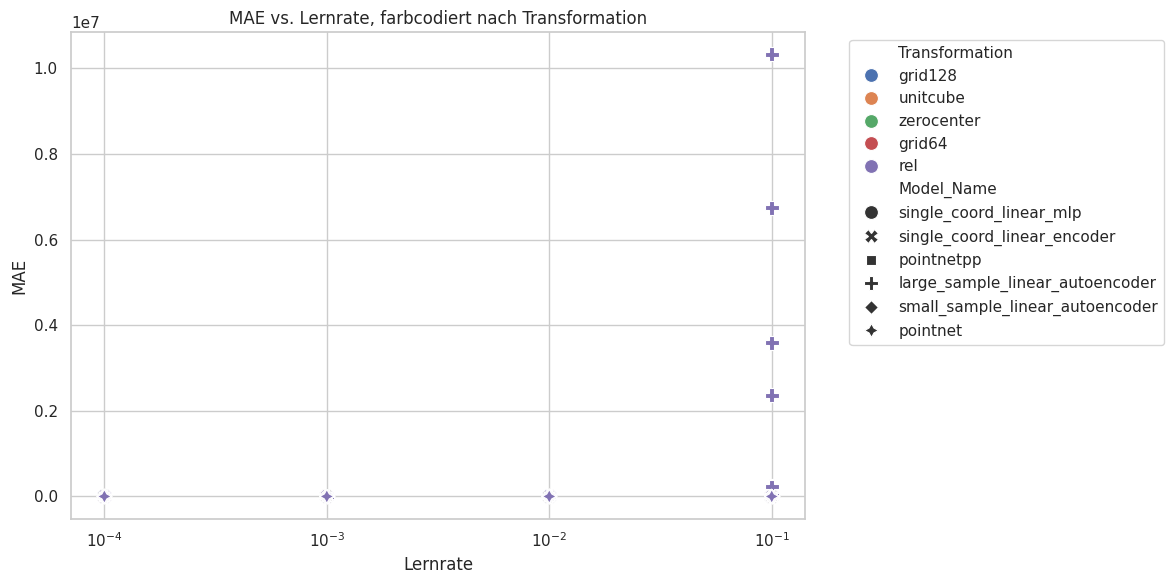

In [102]:
for metric in ['MSE', 'MAE']:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=result_df, x='Learning_Rate', y=metric, hue='Transformation', style='Model_Name', s=100)
    plt.title(f'{metric} vs. Lernrate, farbcodiert nach Transformation')
    plt.xlabel('Lernrate')
    plt.ylabel(metric)
    plt.xscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [103]:
# Funktion zur Identifizierung der besten Lernrate
def find_best_learning_rate(df, metric, minimize=True):
    if minimize:
        idx = df.groupby(['Model_Name', 'Transformation'])[[metric]].idxmin()
    else:
        idx = df.groupby(['Model_Name', 'Transformation'])[[metric]].idxmax()
    best_lr = df.loc[idx[metric]]
    return best_lr

# Beste Lernrate basierend auf MSE
best_lr_mse = find_best_learning_rate(result_df, 'MSE', minimize=True)
print("Beste Lernraten basierend auf MSE:")
print(best_lr_mse[['Model_Name', 'Transformation', 'Learning_Rate', 'MSE']])

# Beste Lernrate basierend auf Cosine Similarity
best_lr_cosine = find_best_learning_rate(result_df, 'Cosine_Similarity', minimize=False)
print("Beste Lernraten basierend auf Cosine Similarity:")
print(best_lr_cosine[['Model_Name', 'Transformation', 'Learning_Rate', 'Cosine_Similarity']])

Beste Lernraten basierend auf MSE:
                           Model_Name Transformation  Learning_Rate       MSE
1688  large_sample_linear_autoencoder        grid128         0.0010  0.077690
1619  large_sample_linear_autoencoder         grid64         0.0100  0.036636
1763  large_sample_linear_autoencoder            rel         0.0001  0.005175
1526  large_sample_linear_autoencoder       unitcube         0.0100  0.002283
1736  large_sample_linear_autoencoder     zerocenter         0.0001  0.003121
2050                         pointnet        grid128         0.1000  0.031454
2087                         pointnet         grid64         0.0100  0.039937
2150                         pointnet            rel         0.0010  0.003636
2159                         pointnet       unitcube         0.0001  0.004008
2078                         pointnet     zerocenter         0.0100  0.004679
473                        pointnetpp        grid128         0.0010  0.077971
413                        po

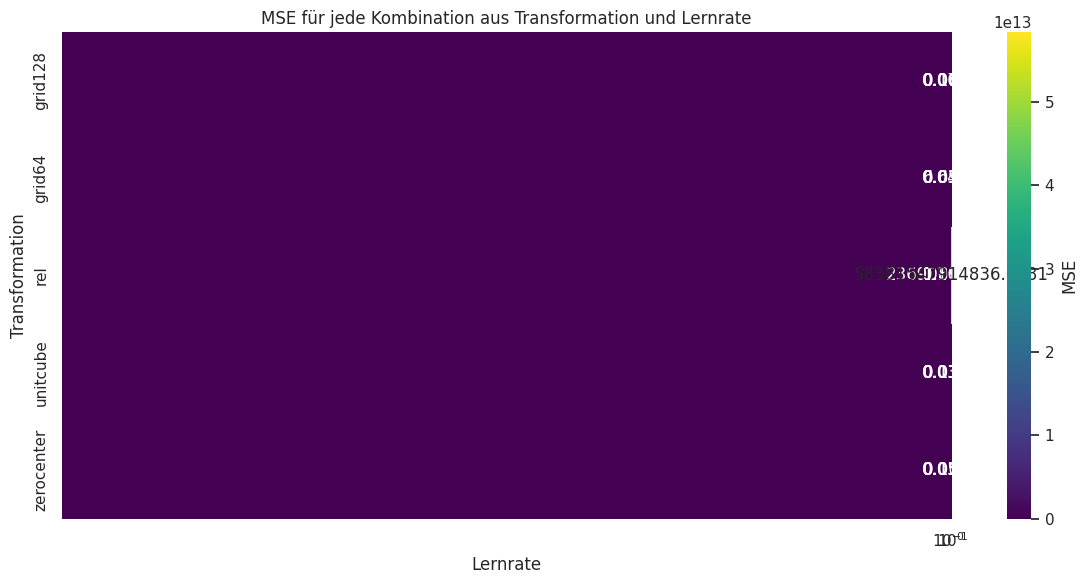

In [108]:
# Mittelwerte der Metriken für Kombinationen aus Lernrate und Transformation
avg_metrics_lr_trans = result_df.groupby(['Transformation', 'Learning_Rate']).mean(numeric_only=True).reset_index()

# Pivot-Tabelle für die Heatmap
pivot_table = avg_metrics_lr_trans.pivot_table(index='Transformation', columns='Learning_Rate', values='MSE')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='viridis', cbar_kws={'label': 'MSE'})
plt.title('MSE für jede Kombination aus Transformation und Lernrate')
plt.xlabel('Lernrate')
plt.ylabel('Transformation')
plt.xscale('log')
plt.tight_layout()
plt.show()

## 3. Vergleich von Rotation True/False
### Fragen:
- Wie wirkt sich die Rotation auf die Modellleistung aus?
- Ist der Einfluss der Rotation abhängig von der Transformation?
- Gibt es Modelle, die stärker von Rotation profitieren?
### Visualisierungen:
- **Grouped Barplot**: Vergleich von MSE/MAE/Cosine Similarity bei Rotation True/False pro Modell und Transformation.
- **Heatmap**: Unterschied der Performance (z. B. ΔMSE) zwischen Rotation True und False für jede Kombination von Modell und Transformation.

## 4. Fall-spezifische Auswertung
### Fragen:
- Gibt es Unterschiede in der Modellperformance je nach Testfall?
- Sind bestimmte Transformationen besser für spezifische Testfälle geeignet?
- Gibt es Modelle, die konsistent über alle Testfälle hinweg gut abschneiden?
### Visualisierungen:
- **Heatmap**: Durchschnittliche MSE/MAE/Cosine Similarity pro Testfall und Modell.
- **Boxplot**: Verteilung der MSE/MAE/Cosine Similarity pro Testfall.
- **Radar Chart**: Vergleich der Cosine Similarity der besten Modelle über alle Testfälle.

## 5. Transformation-spezifische Trends
### Fragen:
- Welche Transformation liefert die konsistent besten Ergebnisse?
- Wie unterscheiden sich die Performance-Metriken bei komplexeren Transformationen (z. B. grid64 vs. grid128)?
- Ist der Effekt der Transformation abhängig von der Rotation?
### Visualisierungen:
- **Barplot**: Durchschnittliche MSE/MAE/Cosine Similarity pro Transformation.
- **Facet Grid**: Boxplots für jede Kombination aus Transformation und Rotation.
- **Heatmap**: MSE/MAE/Cosine Similarity für Kombinationen aus Transformation und Modell.

## 6. Wechselwirkungen zwischen Metriken
### Fragen:
- Gibt es eine Korrelation zwischen MSE, MAE und Cosine Similarity?
- Liefern Modelle mit niedrigem MSE auch immer die beste Cosine Similarity?
- Gibt es Transformationen, bei denen sich MSE und Cosine Similarity widersprechen?
### Visualisierungen:
- **Pairplot (Scatterplot-Matrix)**: Beziehungen zwischen MSE, MAE und Cosine Similarity.
- **Correlation Heatmap**: Korrelationsmatrix zwischen MSE, MAE und Cosine Similarity.
- **Scatterplot**: MSE vs. Cosine Similarity, farbcodiert nach Transformation oder Modell.

## 7. Zeitliche Entwicklung der Metriken
Falls Sie Zugriff auf Zwischenwerte während des Trainings haben:

### Fragen:
- Wie entwickelt sich der MSE über die Epochen hinweg?
- Gibt es Unterschiede in der Konvergenzgeschwindigkeit zwischen den Modellen?
- Wie beeinflusst die Lernrate die Konvergenz?
### Visualisierungen:
- **Lineplot**: MSE über die Epochen hinweg, getrennt nach Modell, Transformation und Lernrate.
- **Heatmap**: Epochen bis zur Konvergenz (z. B. ΔMSE < Schwellenwert) für jedes Modell und jede Lernrate.

## 8. Bestes Modell und beste Konfiguration
### Fragen:
- Welche Kombination aus Modell, Transformation, Rotation und Lernrate liefert die besten Ergebnisse für jede Metrik?
- Gibt es eine Konfiguration, die universell gut funktioniert (über alle Testfälle hinweg)?
- Wie viel Varianz besteht zwischen den Testfällen?
### Visualisierungen:
- **Table**: Top-Modelle und Konfigurationen für jede Metrik.
- **Boxplot**: Vergleich der Varianz zwischen verschiedenen Testfällen bei der besten Konfiguration.
- **Violinplot**: Verteilung der Metriken für die besten Modelle.

## 9. Statistische Tests
### Fragen:
- Sind die Unterschiede zwischen den Modellen signifikant?
- Hat die Wahl der Transformation einen signifikanten Einfluss auf die Performance?
- Ist Rotation ein statistisch signifikanter Faktor?
### Tests:
- **ANOVA**: Um Unterschiede zwischen Gruppen (Modelle, Transformationen) zu analysieren.
- **t-Test**: Vergleich von Rotation True vs. False.


## 10. Hypothesenbasierte Analysen
Falls Sie Hypothesen zu den Experimenten haben, könnten Sie folgende Fragen untersuchen:

- Ist eine feinere Gitterauflösung (z. B. grid128) immer besser als grid64?
- Profitieren komplexere Modelle stärker von Rotation als einfache Modelle?
- Ist Cosine Similarity zuverlässiger als MSE zur Beurteilung der Modellqualität?